In [7]:
%matplotlib inline
%load_ext autoreload
%autoreload 5
%autosave 15

import pandas as pd
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Autosaving every 15 seconds


In [8]:
help(sklearn) # dir

Help on package sklearn:

NAME
    sklearn

DESCRIPTION
    Machine learning module for Python
    
    sklearn is a Python module integrating classical machine
    learning algorithms in the tightly-knit world of scientific Python
    packages (numpy, scipy, matplotlib).
    
    It aims to provide simple and efficient solutions to learning problems
    that are accessible to everybody and reusable in various contexts:
    machine-learning as a versatile tool for science and engineering.
    
    See http://scikit-learn.org for complete documentation.

PACKAGE CONTENTS
    __check_build (package)
    _build_utils
    _hmmc
    _isotonic
    base
    calibration
    cluster (package)
    covariance (package)
    cross_decomposition (package)
    cross_validation
    datasets (package)
    decomposition (package)
    dummy
    ensemble (package)
    externals (package)
    feature_extraction (package)
    feature_selection (package)
    gaussian_process (package)
    grid_search
    hmm

In [9]:
# Load Data
digits = datasets.load_digits()
diabetes = datasets.load_diabetes()
print ("digits shape: ", digits.data.shape)
print ("diabetes shape: ", diabetes.data.shape)

digits shape:  (1797, 64)
diabetes shape:  (442, 10)


target value:  0


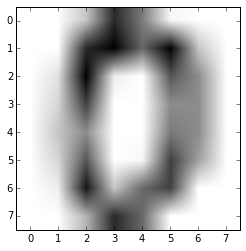

In [10]:
plt.imshow(digits.data[0].reshape(8, 8), cmap=plt.cm.Greys)
print ("target value: ", digits.target[0])

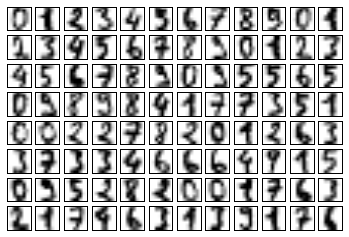

In [48]:
fig, ax = plt.subplots(8, 12, subplot_kw={'xticks':[], 'yticks':[]})

for i in range(ax.size):
    ax.flat[i].imshow(digits.data[i].reshape(8, 8),
                      cmap=plt.cm.Greys)

In [14]:
# Data preparation
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.10, random_state=23)

In [18]:
# Build LinearRegression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

print(lin_reg.score(X_test, y_test))

0.474531473669


In [19]:
# Data preparation
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.20, random_state=23)

In [23]:
# Build LogisticRegression Model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
print(log_reg.score(X_test, y_test))

0.952777777778


In [24]:
# Evaluate metrics
print (sklearn.metrics.classification_report(y_test, log_reg.predict(X_test)))
print ("----------------------------------------------------------")
print (sklearn.metrics.confusion_matrix(y_test, log_reg.predict(X_test)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        30
          1       0.88      0.88      0.88        40
          2       1.00      0.97      0.99        38
          3       0.91      1.00      0.95        29
          4       1.00      0.93      0.96        40
          5       0.98      1.00      0.99        44
          6       1.00      0.97      0.98        31
          7       0.93      1.00      0.97        28
          8       0.85      0.92      0.89        38
          9       1.00      0.90      0.95        42

avg / total       0.96      0.95      0.95       360

----------------------------------------------------------
[[30  0  0  0  0  0  0  0  0  0]
 [ 0 35  0  1  0  0  0  0  4  0]
 [ 0  0 37  1  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0]
 [ 0  2  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 44  0  0  0  0]
 [ 0  1  0  0  0  0 30  0  0  0]
 [ 0  0  0  0  0  0  0 28  0  0]
 [ 0  2  0  0  0  1  0  0 35  0]
 [ 0 

In [25]:
boston = datasets.load_boston()

In [27]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [52]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.20, random_state=23)
# Build LinearRegression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

print(lin_reg.score(X_test, y_test))
coef = lin_reg.coef_

0.745021053017


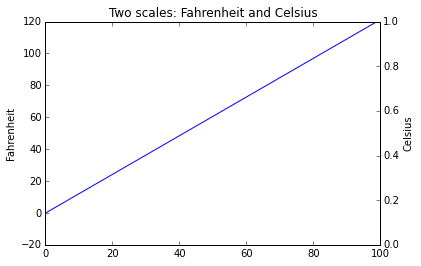

In [53]:
fig, ax_f = plt.subplots()
ax_c = ax_f.twinx()

# automatically update ylim of ax2 when ylim of ax1 changes.
ax_f.plot(np.linspace(coef[0], 120, 100))
ax_f.set_xlim(0, 100)

ax_f.set_title('Two scales: Fahrenheit and Celsius')
ax_f.set_ylabel('Fahrenheit')
ax_c.set_ylabel('Celsius')

plt.show()